# Techno Hacks Edutech Data Analyst Internship 
## TASK-1

### Perform data cleaning and classification on the given dataset by identifying and removing missing values and outliers using relevant Python libraries.

#### Given Dataset-: Titanic dataset imported from Kaggle containing train and test dataset.

In [54]:
#Importing python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df_train=pd.read_csv("titanic_train.csv") # Reading the .CSV file

### Previewing and Analysing Dataset

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [58]:
df_train.shape

(891, 12)

In [59]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
df_train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,E58,S


In [63]:
df_train.nunique().sort_values() #Checking for unique values in each column

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [64]:
df_train.isnull().sum() #Checking for Null or Missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

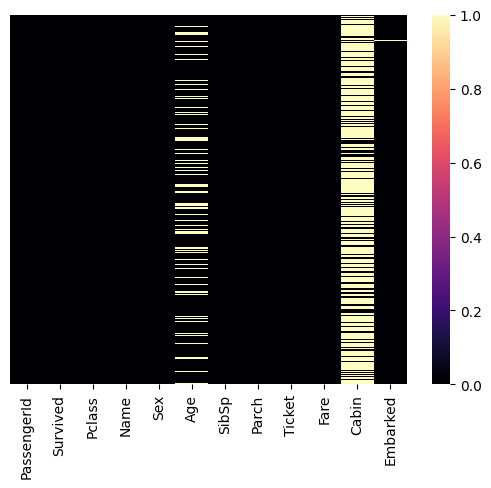

In [65]:
## Overview of NULL values for each column by heatmap to get clear idea of missing values and simplicity
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='magma')

In [66]:
## Percentage total of NULL values column wise
df_train.isnull().sum().sort_values(ascending=False)*100/len(df_train)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

##### The Cabin Column contains more than 75 % of null values hence its better to drop the column

In [67]:
df_train.drop(columns=['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True) ### Dropping Cabin along with some unnecessary columns in the dataset

In [68]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [69]:
len(df_train) # total number of passengers

891

In [70]:
df_train['Survived'].value_counts() # 0 indicates passenger didn't survived || 1 indicates passenger survived

Survived
0    549
1    342
Name: count, dtype: int64

In [71]:
df_train['Sex'].value_counts() # Gender Distribution of Passengers on the ship

Sex
male      577
female    314
Name: count, dtype: int64

In [72]:
df_train.groupby(['Sex'])['Survived'].mean()*100 # Survival Percentage of Passengers by Gender

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [73]:
df_train['Pclass'].value_counts() # Distribution of Passenger count by Class

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [74]:
df_train.groupby(['Pclass'])['Survived'].mean()*100 # Survival Percentage of Passengers by Pclass

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [75]:
df_train['SibSp'].value_counts() # Passengers with siblings or spouse

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [76]:
df_train['Parch'].value_counts() # Passengers with Parent or Child

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [77]:
df_train['Embarked'].value_counts() # Count of Passengers by Embarked column

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

## Handling Missing Values

In [78]:
## Filling missing value with the mean value of age column
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

## Filling missing value with the mode value of Embarked column
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)


In [79]:
df_train.isnull().sum() # All the missing values present in the data set has been cleared out

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: >

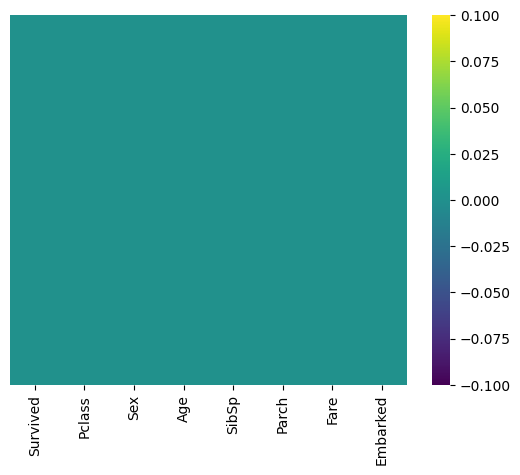

In [80]:
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='viridis') # Final Overview by Heatmap

## Conclusion

The given titatic dataset contains messy data along with lots of missing values and unnecessary data as well. After initial analysis it has been found that the Age and the Cabin column contains the most missing values. However, the percentage of missing value for the Cabin column is > 75% so its better to drop and no more consider for analysis and the Age column can be filled by taking the absolute mean value of the entire column. Hence, after handling missing values and dropping unnecessary columns the data is clean for further visualisation and model training step.